In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt


In [2]:
def piecewiseLinTransform(image, coeffs):
    ht = image.shape[0]
    wt = image.shape[1]

    img = ConvertToGray1(image)

    for i in range(ht):
        for j in range(wt):
            for coeff in coeffs:

                # coeff[0] = K1, coeff[1] = K2, coeff[2] = a, coeff[3] = b
                # K1 : slope, K2 : intercept, a, b: intensities in [0,1]

                if(img[i][j] <= coeff[3]*255 and img[i][j] >= coeff[2]*255):
                    image[i][j][:] = np.round((((image[i][j][1] * coeff[0])/255) + coeff[1])*255)
                    break
    return image

def ConvertToGray1(img):
    b = img[:,:,0]
    g = img[:,:,1]
    r = img[:,:,2]

    avg = np.round((b*0.114) + (0.299*r) + (0.587*g)).astype(int)

    img[:,:,0] = avg
    img[:,:,1] = avg
    img[:,:,2] = avg

    return img[:,:,0]

def padImage(img, pad):
    H, W = img.shape
    new_img = np.zeros((H+(2*pad),W+(2*pad)), dtype="int")
    new_img[pad:H+pad, pad:W+pad] = img[:, :]

    for i in range(pad):
        new_img[i,:] = new_img[(2*pad) - 1-i]
        new_img[i+pad + H,:] = new_img[H+(pad) - 1-i]
        new_img[:,i] = new_img[:, (2*pad) - 1-i]
        new_img[:, i+pad + W,] = new_img[:, W+(pad) - 1-i]

    return new_img


[[9, 24], [9, 274], [9, 300], [9, 569], [9, 596], [9, 744], [9, 770], [9, 977], [89, 596], [89, 744], [102, 596], [102, 744], [121, 300], [121, 569], [153, 770], [153, 977], [185, 24], [185, 274], [185, 596], [185, 744], [198, 24], [198, 274], [232, 24], [232, 274]]


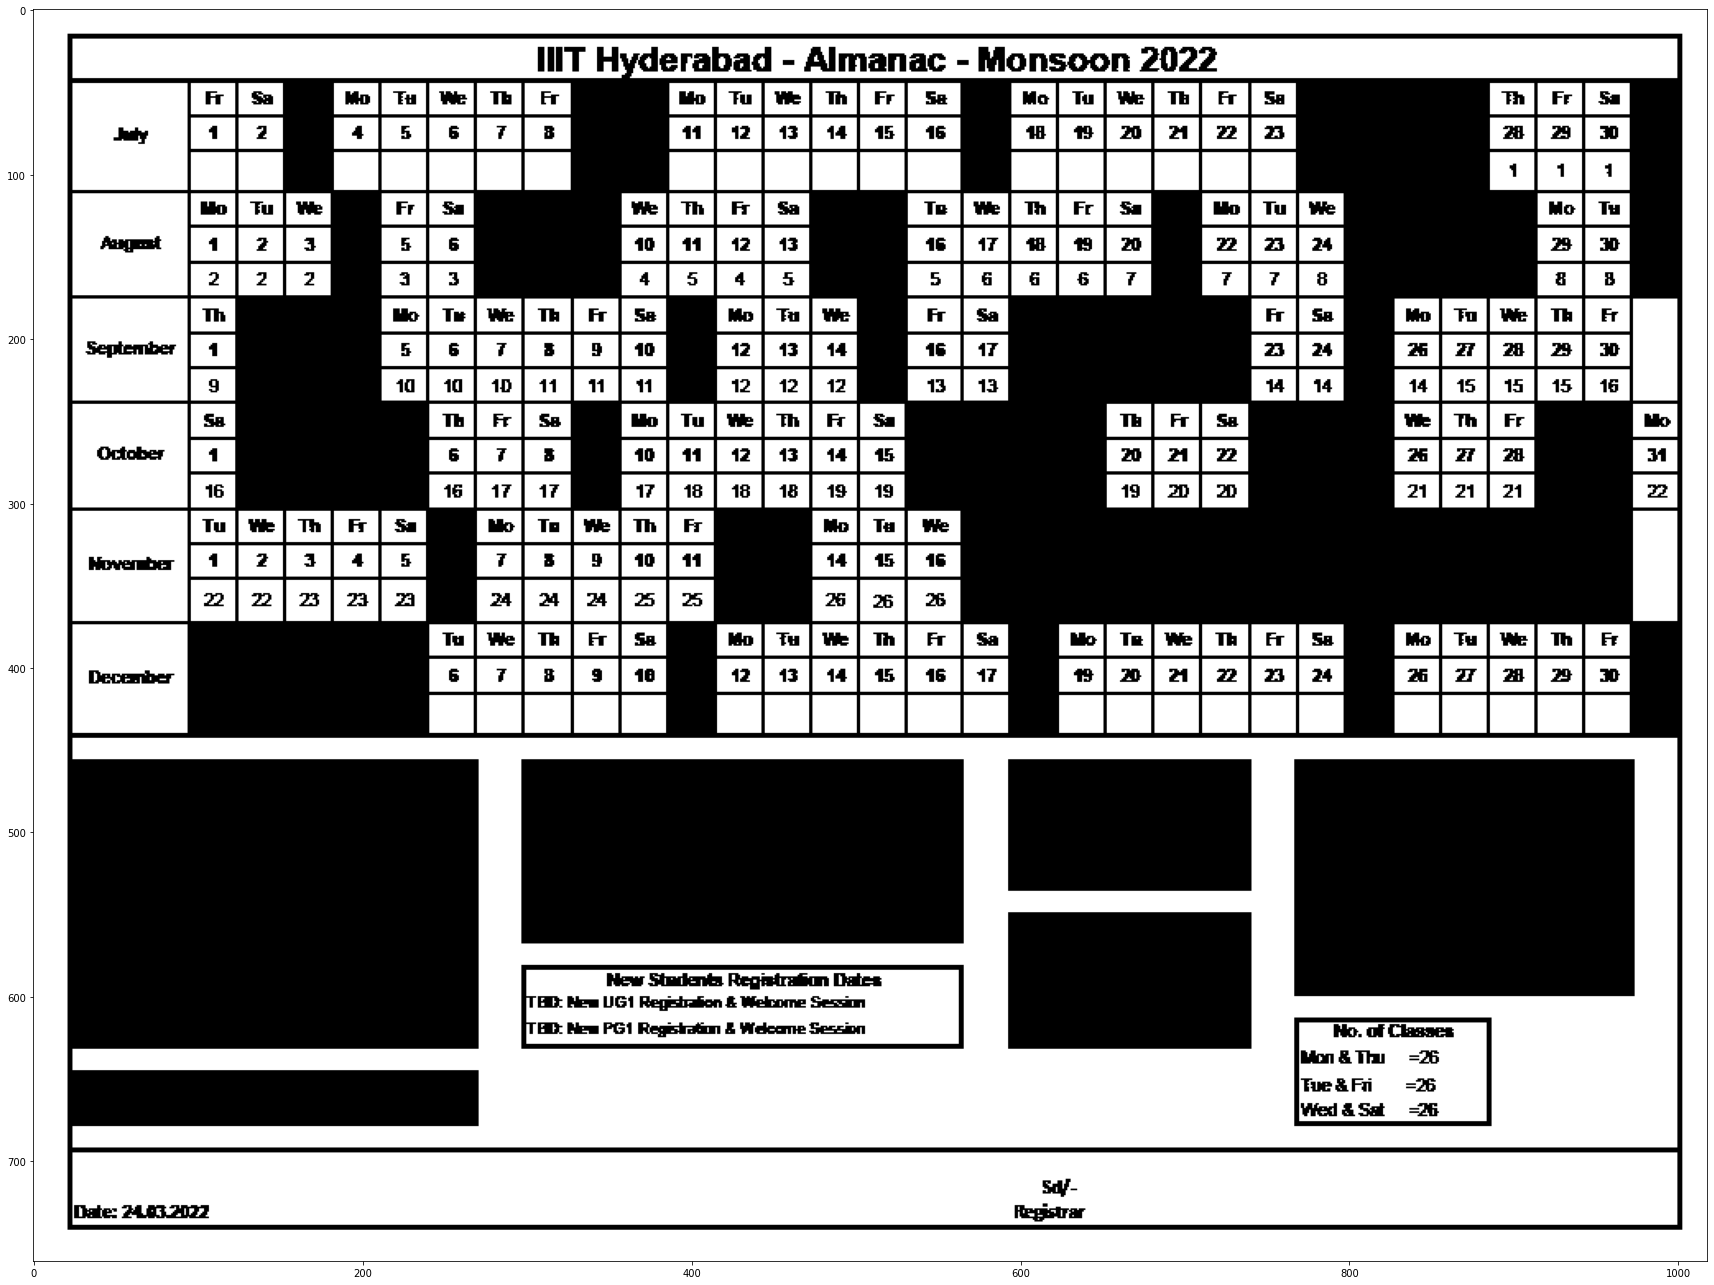

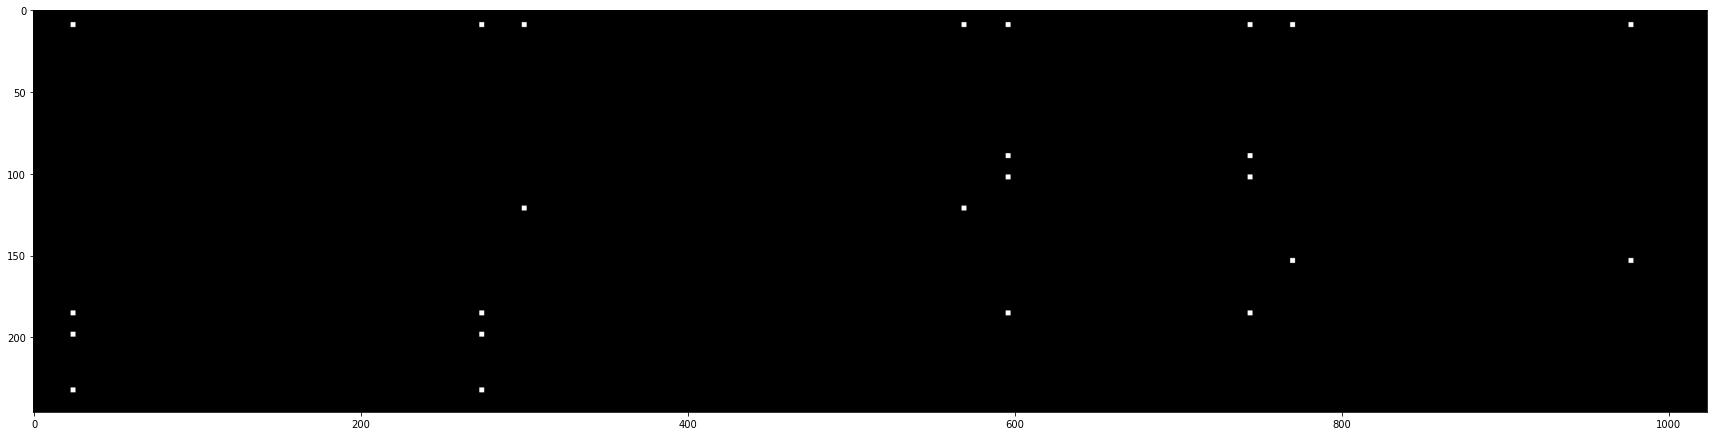

In [10]:
img = cv2.imread("./Almanac.png",0)
tmp,img_bin = cv2.threshold(img,240,255,cv2.THRESH_BINARY)
# shapes = (piecewiseLinTransform(img, [[0,0,0.0, 0.5], [0,1,0.5,1], [0,1,1,1]]))
fig = plt.figure(figsize=(30,40))
plt.imshow(img_bin,cmap='gray')

img_bin = img_bin[450:690]
kernel = np.ones((7,7))
img_bin = cv2.morphologyEx(img_bin, cv2.MORPH_CLOSE, kernel)

H = img_bin.shape[0]
W = img_bin.shape[1]

kernel_size = 7
pad = kernel_size//2

kernel1 = np.zeros((kernel_size,kernel_size), dtype=int)
kernel1[pad:kernel_size, pad:kernel_size] = 255

kernel2 = np.ones((kernel_size,kernel_size), dtype=int)*255
kernel2[pad:kernel_size, pad:kernel_size] = 0

kernel3 = np.ones((kernel_size,kernel_size), dtype=int)*255
kernel3[pad:kernel_size, 0:pad] = 0

kernel4 = np.ones((kernel_size,kernel_size), dtype=int)*255
kernel4[0:pad, pad:kernel_size] = 0

kernel5 = np.ones((kernel_size,kernel_size), dtype=int)*255
kernel5[0:pad, 0:pad] = 0

kernel6 = np.zeros((kernel_size,kernel_size), dtype=int)
kernel6[0:pad, pad:kernel_size] = 255

new_img = np.zeros((H+(2*pad), W+(2*pad)), dtype=int)
new_img[:,:] = padImage(img_bin[:,:], pad)

# plt.imshow(new_img, cmap='gray')

coords = []

for i in range(pad,H+pad):
    for j in range(pad, W+pad):
        # outKernel = np.bitwise_or(kernel, new_img[i-pad:i+pad+1, j-pad:j+pad+1])
        # break
        outKernel = new_img[i-pad:i+pad+1, j-pad:j+pad+1]
        if((outKernel == kernel1).all()):
            coords.append([i,j])
            # fig = plt.figure(figsize=(10,15))
            # plt.imshow(outKernel)
        if((outKernel == kernel2).all()):
            coords.append([i,j])
            # fig = plt.figure(figsize=(10,15))
            # plt.imshow(outKernel)
        
        if((outKernel == kernel3).all()):
            coords.append([i,j])

        if((outKernel == kernel4).all()):
            coords.append([i,j])
        
        if((outKernel == kernel5).all()):
            coords.append([i,j])

        if((outKernel == kernel6).all()):
            coords.append([i,j])
        


fig = plt.figure(figsize=(30,40))
print(coords)

img = np.zeros((new_img.shape))
for i in range(len(coords)):
    img[coords[i][0]-1:coords[i][0]+2, coords[i][1]-1: coords[i][1]+2] = 255

# plt.subplot(121)
# plt.imshow(new_img, cmap='gray')
# plt.imshow(new_img[230:, 20:30], cmap="gray")
# plt.subplot(122)
plt.imshow(img, cmap="gray")


[[9, 27], [9, 274], [9, 300], [9, 569], [9, 596], [9, 744], [9, 770], [9, 977], [89, 596], [89, 744], [102, 596], [102, 744], [121, 300], [121, 569], [134, 569], [137, 303], [141, 422], [147, 519], [153, 770], [153, 977], [166, 890], [169, 773], [176, 430], [178, 867], [185, 27], [185, 274], [185, 300], [185, 569], [185, 596], [185, 744], [198, 27], [198, 274], [232, 27], [232, 274], [232, 770], [232, 890]]


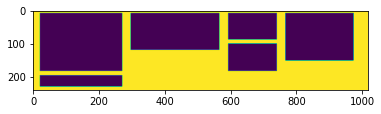

In [9]:
print(coords)
plt.imshow(img_bin)
